In [63]:
import re
import matplotlib
import copy
from itertools import chain
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [64]:
words = pd.read_csv('../data/collage_words.csv')
words.dropna(inplace=True)
words.head()

,Brand,Words
0,7UP,"no person, leaf, nature, flora, grass, food, w..."
1,7UP,"sunset, grinder, energy, water, industry, pier..."
2,7UP,"nature, hammock, tree, wood, summer, outdoors,..."
3,7UP,"portrait, man, people, one, adult, sunglasses,..."
4,7UP,"storm, rain, sunset, sky, landscape, dawn, nat..."


In [65]:
cats = pd.read_csv('../data/Categories.csv')
cats.dropna(inplace=True)
catwise = cats.groupby(by=['Category'], as_index=True).agg(lambda x: ", ".join(x)).squeeze()
cat=catwise['Cars'].split(", ")
cat

['Acura',
 'Audi',
 'BMW',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'Ferrari',
 'Ford',
 'GMC',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Lexus',
 'Lincoln',
 'Mazda',
 'Mercedes Benz',
 'Mitsubishi',
 'Nissan',
 'Pontiac',
 'Porsche',
 'Subaru',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [66]:
brandwise = words.groupby(by=['Brand'], as_index=False).agg(lambda x: ", ".join(x))
brandwise=brandwise[brandwise.Brand.isin(cat)]
brandwise

,Brand,Words
9,Acura,"science, flame, biology, cellular telephone, a..."
26,Audi,"city, architecture, sky, urban, downtown, city..."
28,BMW,"aircraft, airplane, vehicle, airport, military..."
48,Buick,"car, vehicle, automotive, wheel, transportatio..."
51,Cadillac,"food, vegetable, market, cabbage, grow, health..."
65,Chevrolet,"landscape, sun, rural, grass, field, nature, c..."
68,Chrysler,"flag, stripe, administration, patriotism, unit..."
97,Dodge,"no person, agriculture, landscape, nature, cro..."
109,Ferrari,"crocodile, wildlife, alligator, danger, tooth,..."
114,Ford,"leather, old, people, no person, wear, fashion..."


In [67]:
car_words=brandwise["Words"].values

In [68]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=10)
lda = LatentDirichletAllocation(n_components=5, n_jobs=-1,random_state=101)
X = count_vectorizer.fit_transform(car_words)

In [69]:
doc_topic = lda.fit_transform(X) 

In [70]:
topic_word = lda.components_
#most_relevant_topics = np.flip(np.argsort(doc_topic, axis=1), axis=1)[:, :30]
most_relevant_words = np.flip(np.argsort(topic_word, axis=1), axis=1)[:, :50]

In [71]:
TOPIC_WORDS=pd.DataFrame(topic_word, columns=count_vectorizer.get_feature_names_out())
TOPIC_WORDS

,abandoned,abundance,accessory,accident,achievement,acoustic,active,actor,actress,administration,...,wet,wheat,white,wind,windshield,wing,wire,wooden,yacht,zoo
0,6.441167,0.315493,10.473571,0.202473,7.713317,2.132806,1.104358,10.401319,3.403383,1.623245,...,22.830852,5.355892,18.859313,13.481831,0.202137,6.875855,0.201120,6.268486,3.063054,19.225725
1,42.400248,0.202237,2.518188,17.204081,5.138101,6.839007,5.082900,17.971721,8.278148,43.846709,...,21.418987,15.284888,40.765019,45.467021,15.910047,16.888502,12.500194,40.495891,0.204642,13.998101
2,12.174732,0.213777,0.209559,1.104354,5.686285,1.098197,5.900052,0.203163,0.226593,0.204639,...,19.402469,0.203944,3.669307,0.225378,0.203720,5.329832,5.372185,4.984131,3.933179,0.563455
3,4.780111,5.543103,0.201216,1.150511,10.711096,0.202203,0.200667,1.907898,1.045808,22.481709,...,1.993641,1.953099,11.921473,8.874755,1.940160,0.903012,0.200001,3.331677,0.200605,0.200338
4,0.203742,35.725390,2.597467,1.338581,61.751200,3.727787,5.712023,18.515899,5.046068,19.843697,...,14.354051,0.202176,12.784888,3.951015,1.743936,9.002800,2.726500,5.919814,18.598520,5.012381


topic  0


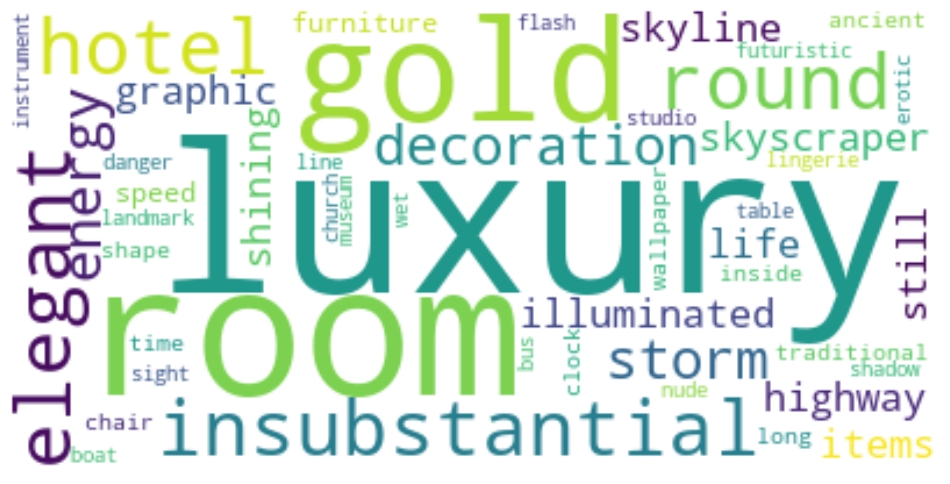

topic  1


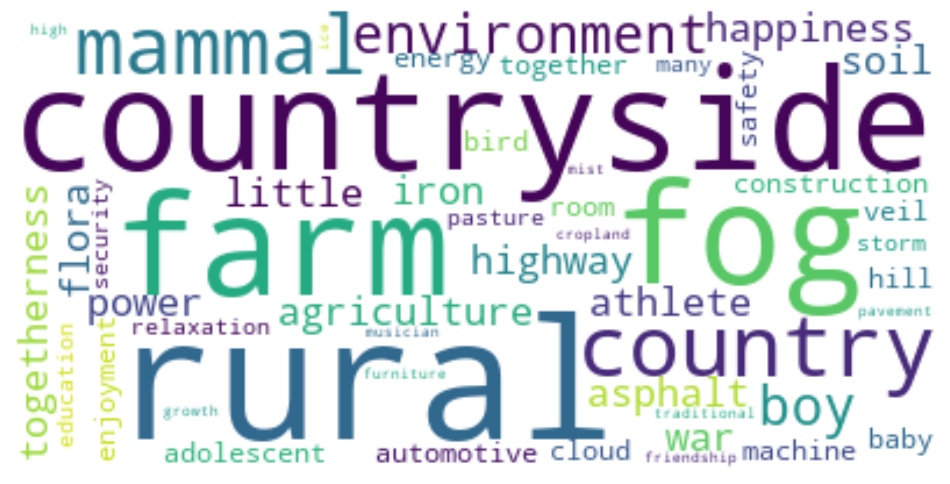

topic  2


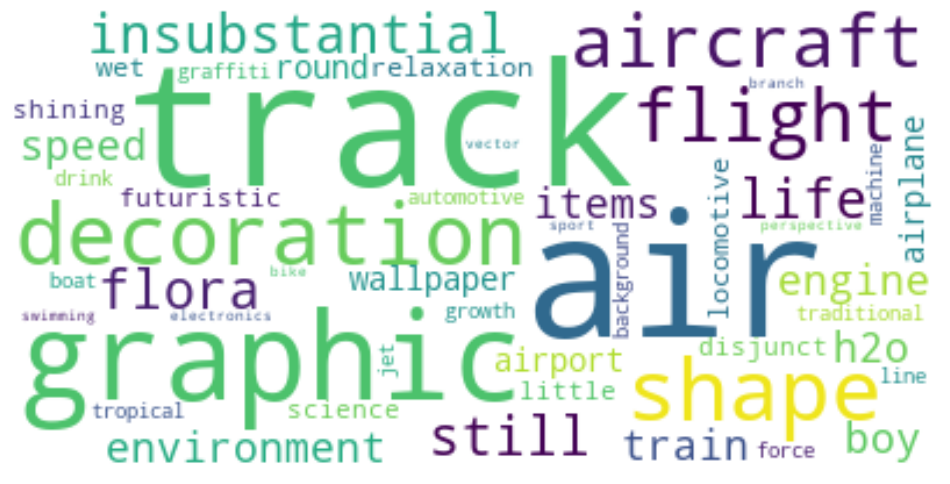

topic  3


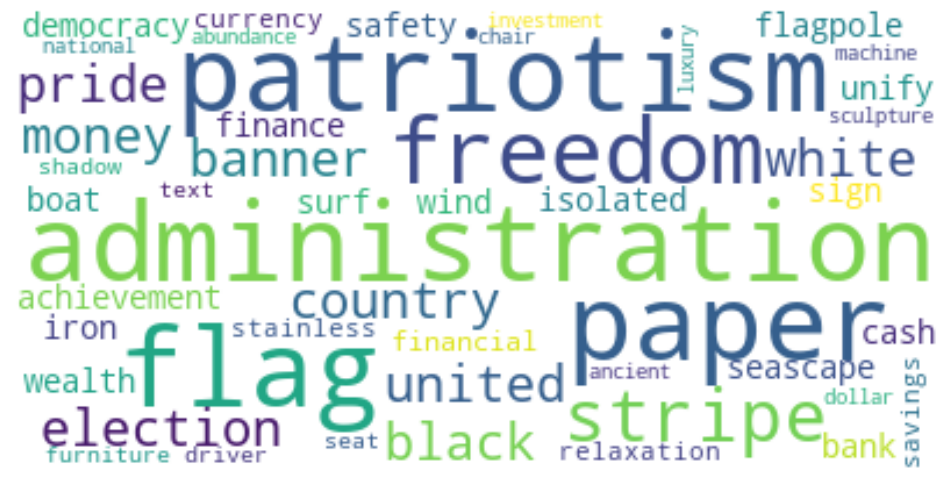

topic  4


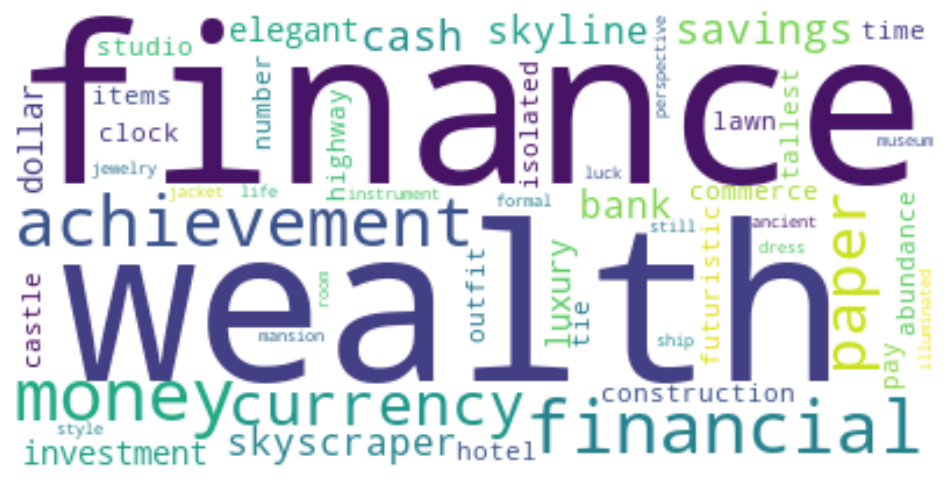

In [72]:
cloud=[]
most_relevant_topic_words=[]
for i in range(5):
  print("topic ", i)
  text = ' '.join(np.array(count_vectorizer.get_feature_names_out())[most_relevant_words[i]])
  most_relevant_topic_words.append([i,np.array(count_vectorizer.get_feature_names_out())[most_relevant_words[i]]])
  cloud.append(WordCloud(background_color='white').generate(text))
  plt.imshow(cloud[i], interpolation='bilinear')
  plt.axis('off')
  plt.show()

Now let's look at the most popular words for different car brands

In [73]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05)
td_idf = np.array(vectorizer.fit_transform(brandwise["Words"].values).todense())
ids = np.flip(td_idf.argsort(axis=1), axis=1)

In [74]:
TD_IDF=pd.DataFrame(td_idf, index=brandwise['Brand'], columns=vectorizer.get_feature_names_out())
TD_IDF.head()

,abandoned,abbey,abdomen,abdominal,abundance,access,accessory,accident,accomplishment,accuracy,...,written,yacht,yard,yarn,youth,zebra,zen,zoo,zoology,zoom
Brand,,,,,,,,,,,,,,,,,,,,,
Acura,0.028877,0.0,0.029768,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.020102,0.000000,0.0,0.000000,0.07535,0.0,0.116328,0.000000,0.023940
Audi,0.024147,0.0,0.000000,0.0,0.015535,0.000000,0.018280,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.013896,0.000000,0.020019
BMW,0.000000,0.0,0.000000,0.0,0.071042,0.000000,0.000000,0.000000,0.0,0.081022,...,0.026303,0.030747,0.060767,0.0,0.020256,0.00000,0.0,0.000000,0.042841,0.018309
Buick,0.046960,0.0,0.000000,0.0,0.000000,0.025895,0.053323,0.017032,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.043071,0.00000,0.0,0.013512,0.000000,0.000000
Cadillac,0.029233,0.0,0.000000,0.0,0.037615,0.000000,0.022130,0.021205,0.0,0.000000,...,0.034817,0.020349,0.026812,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000


In [75]:
cat_inds = [list(brandwise['Brand'].values).index(brand) for brand in cat]
most_relevant_brand_words=[]
for i, brand in enumerate(cat):
    print(brand)
    text = ' '.join(np.array(vectorizer.get_feature_names_out())[ids[cat_inds[i], :50]])
    most_relevant_brand_words.append([brand, np.array(vectorizer.get_feature_names_out())[ids[cat_inds[i], :50]]])
    cloud = WordCloud(background_color='white').generate(text)
    # plt.imshow(cloud, interpolation='bilinear')
    # plt.axis('off')
    # plt.show()
    # if i ==0:
    #   break

Acura
Audi
BMW
Buick
Cadillac
Chevrolet
Chrysler
Dodge
Ferrari
Ford
GMC
Honda
Hyundai
Infiniti
Jeep
Kia
Lamborghini
Lexus
Lincoln
Mazda
Mercedes Benz
Mitsubishi
Nissan
Pontiac
Porsche
Subaru
Toyota
Volkswagen
Volvo


As we can see, some of these make no sense for us. Let's then create a score that says how similar a brand to a topic

In [76]:
for i, brand in enumerate(cat):
  T=TD_IDF.to_numpy()[i]
  T=[i for i in T if i >0]
  print(len(T))

589
514
592
708
659
616
598
594
639
622
557
558
598
476
462
614
546
715
581
730
539
638
540
492
578
670
719
383
528


That's lenghts of clouds. So 50 is at most 10% in one case almost 20%. Is it too much? Idk

In [77]:
pd.DataFrame(most_relevant_brand_words)

,0,1
0,Acura,"[actor, safari, zoo, hotel, mammal, finelookin..."
1,Audi,"[lightning, thunderstorm, thunder, thunderbolt..."
2,BMW,"[clock, minute, time, watch, wristwatch, alarm..."
3,Buick,"[automotive, elderly, instrument, pavement, hi..."
4,Cadillac,"[hotel, juice, storm, fruit, nutrition, vegeta..."
5,Chevrolet,"[flora, rural, boy, farm, growth, country, dee..."
6,Chrysler,"[administration, united, flag, patriotism, emb..."
7,Dodge,"[rural, countryside, farm, country, agricultur..."
8,Ferrari,"[air, life, still, balloon, airplane, flight, ..."
9,Ford,"[mammal, farm, energy, backlit, instrument, pe..."


In [78]:
pd.DataFrame(most_relevant_topic_words)

,0,1
0,0,"[luxury, room, gold, insubstantial, round, ele..."
1,1,"[rural, countryside, farm, fog, country, mamma..."
2,2,"[air, track, graphic, decoration, shape, aircr..."
3,3,"[administration, flag, patriotism, paper, free..."
4,4,"[finance, wealth, money, financial, achievemen..."


In [79]:
score=[]
for i in range(len(most_relevant_brand_words)):
  score_m=[]
  for j in range(len(most_relevant_topic_words)):
    inters=list(set(most_relevant_brand_words[i][1]).intersection(set(most_relevant_topic_words[j][1])))
    union=list(set(most_relevant_brand_words[i][1]).union(set(most_relevant_topic_words[j][1])))
    #union = most_relevant_brand_words[i][1] + [x for x in most_relevant_topic_words[j][1] if i not in most_relevant_brand_words[i][1]]
    score_m.append(len(inters)/len(union))
  score.append(score_m)
score=pd.DataFrame(score, columns=range(5), index=cat)
score

,0,1,2,3,4
Acura,0.136364,0.098901,0.041667,0.052632,0.111111
Audi,0.219512,0.041667,0.030928,0.030928,0.098901
BMW,0.063830,0.000000,0.020408,0.149425,0.298701
Buick,0.123596,0.190476,0.030928,0.075269,0.075269
Cadillac,0.123596,0.041667,0.063830,0.190476,0.162791
Chevrolet,0.000000,0.282051,0.052632,0.020408,0.010101
Chrysler,0.010101,0.030928,0.000000,0.612903,0.162791
Dodge,0.020408,0.265823,0.020408,0.075269,0.010101
Ferrari,0.111111,0.052632,0.123596,0.052632,0.111111
Ford,0.030928,0.111111,0.020408,0.041667,0.020408


In [80]:
score_cleaned=copy.copy(score)
score_cleaned[score_cleaned<0.1]=0
score_cleaned.columns=['luxury',"rural",'power', 'pariotism','finance']
score_cleaned

,luxury,rural,power,pariotism,finance
Acura,0.136364,0.000000,0.000000,0.000000,0.111111
Audi,0.219512,0.000000,0.000000,0.000000,0.000000
BMW,0.000000,0.000000,0.000000,0.149425,0.298701
Buick,0.123596,0.190476,0.000000,0.000000,0.000000
Cadillac,0.123596,0.000000,0.000000,0.190476,0.162791
Chevrolet,0.000000,0.282051,0.000000,0.000000,0.000000
Chrysler,0.000000,0.000000,0.000000,0.612903,0.162791
Dodge,0.000000,0.265823,0.000000,0.000000,0.000000
Ferrari,0.111111,0.000000,0.123596,0.000000,0.111111
Ford,0.000000,0.111111,0.000000,0.000000,0.000000


In [81]:
score_cleaned_bi=copy.copy(score)
score_cleaned_bi[score_cleaned_bi<0.1]=0
score_cleaned_bi[score_cleaned_bi>0]=1
score_cleaned_bi.columns=['luxury',"rural",'power', 'pariotism','finance']
score_cleaned_bi

,luxury,rural,power,pariotism,finance
Acura,1.0,0.0,0.0,0.0,1.0
Audi,1.0,0.0,0.0,0.0,0.0
BMW,0.0,0.0,0.0,1.0,1.0
Buick,1.0,1.0,0.0,0.0,0.0
Cadillac,1.0,0.0,0.0,1.0,1.0
Chevrolet,0.0,1.0,0.0,0.0,0.0
Chrysler,0.0,0.0,0.0,1.0,1.0
Dodge,0.0,1.0,0.0,0.0,0.0
Ferrari,1.0,0.0,1.0,0.0,1.0
Ford,0.0,1.0,0.0,0.0,0.0


Curiosly, these things don't change majorly when we change number of top words used. Sure, number of topics change, but Toyota willalways be rural. That's a good sign

# Датасет с продажами

In [82]:
cars_sales = pd.read_csv('../data/country_brand.csv')
cars_sales

,country,brand,cars_sold,country_total,share
0,Argentina,Agrale,769,798665,0.000963
1,Argentina,Alfa Romeo,156,798665,0.000195
2,Argentina,Audi,3571,798665,0.004471
3,Argentina,BAIC Motor,460,798665,0.000576
4,Argentina,BMW,2843,798665,0.003560
...,...,...,...,...,...
2160,Vietnam,Sang Yang Motors,108,270509,0.000399
2161,Vietnam,Suzuki,6897,270509,0.025496
2162,Vietnam,Thaco,16727,270509,0.061835
2163,Vietnam,Toyota,65856,270509,0.243452


In [83]:
cars_sales.loc[cars_sales['brand']=='Mercedes-Benz', 'brand'] = 'Mercedes Benz'
cars_sales.loc[cars_sales['brand']=='Chrysler/Jeep', 'brand'] = 'Chrysler'
cars_sales.loc[cars_sales['brand']=='Chevrolet/GMC', 'brand'] = 'Chevrolet'
cars_sales.loc[cars_sales['brand']=='Opel/Chevrolet', 'brand'] = 'Opel'
cars_sales.loc[cars_sales['brand']=='Hyundai/Inokom', 'brand'] = 'Hyundai'
cars_sales.loc[cars_sales['brand']=='VW', 'brand'] = 'Volkswagen'
cars_sales.loc[cars_sales['brand']=='Volvo Cars', 'brand'] = 'Volvo'

In [84]:
for brand in cars_sales.brand.unique():
  if brand not in cat:
    ind = cars_sales[cars_sales['brand']==brand].index.values
    cars_sales.drop(index = ind, inplace = True)



### Регрессия

Готовый датасет с продажами для регрессии

Датасеты с рейтингами для регресии

In [85]:
score_cleaned_bi.drop(['Pontiac'], axis = 0, inplace = True)

In [86]:
data = pd.get_dummies(cars_sales, columns = ['country'], drop_first = True)

Датафреймы по брендам:

In [87]:
full_data = data.merge(score_cleaned_bi.reset_index().rename(columns={"index":"brand"}), how = 'inner', on = 'brand')
brand_dataframe = []
for brand in full_data.brand.unique():
  brand_dataframe.append(pd.DataFrame(full_data[full_data.isin([brand]).any(axis=1)]))

In [88]:
brand_dataframe[0].sample(5)

,brand,cars_sold,country_total,share,country_Australia,country_Austria,country_Belgium,country_Brazil,country_Bulgaria,country_Canada,...,country_UK,country_USA,country_Ukraine,country_Uruguay,country_Vietnam,luxury,rural,power,pariotism,finance
1,Audi,19416,1146862,0.016930,1,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
5,Audi,1056,34154,0.030919,0,0,0,0,1,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
23,Audi,187,61764,0.003028,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
47,Audi,2917,96220,0.030316,0,0,0,0,0,0,...,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0
10,Audi,2116,59607,0.035499,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [89]:
import statsmodels.api as sm

In [90]:
X = brand_dataframe[0].drop(['country_total', 'share', 'brand', 'cars_sold'], axis = 1)
y = brand_dataframe[0]['cars_sold']

#регрессия продаж отдельного бренда на скоры 
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type = "HC0")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              cars_sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                 1.218e+30
Date:                Wed, 21 Dec 2022   Prob (F-statistic):                nan
Time:                        16:48:34   Log-Likelihood:                 1053.1
No. Observations:                  49   AIC:                            -2008.
Df Residuals:                       0   BIC:                            -1915.
Df Model:                          48                                         
Covariance Type:                  HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
country_Australia       1.58

C:\Users\Tagir\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Tagir\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Tagir\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 60, but rank is 48
  warnings.warn('covariance of constraints does not have full '


In [91]:
full_data.sample(5)

,brand,cars_sold,country_total,share,country_Australia,country_Austria,country_Belgium,country_Brazil,country_Bulgaria,country_Canada,...,country_UK,country_USA,country_Ukraine,country_Uruguay,country_Vietnam,luxury,rural,power,pariotism,finance
476,Mitsubishi,6758,443482,0.015238,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0
172,Ford,8596,109819,0.078274,0,0,0,0,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
873,Mazda,1385,72784,0.019029,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0
344,Kia,10863,2531792,0.004291,0,0,0,1,0,0,...,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0
727,Volvo,1608,266704,0.006029,0,0,0,0,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


In [92]:
X = full_data.drop(['country_total', 'share', 'brand', 'cars_sold'], axis = 1)
y = full_data['share']

#регрессия всех продаж на скоры топиков
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type = "HC0")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  share   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     9.900
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.66e-65
Time:                        16:48:34   Log-Likelihood:                 1626.4
No. Observations:                 952   AIC:                            -3129.
Df Residuals:                     890   BIC:                            -2828.
Df Model:                          61                                         
Covariance Type:                  HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [93]:
#пробуем посмотреть отдельно по странам
country_sales = cars_sales[cars_sales['country'] == 'Luxembourg']
country_for_regr = country_sales.merge(score_cleaned_bi.reset_index().rename(columns={"index":"brand"}), how = 'inner', on = 'brand')
mydata = country_for_regr.sort_values(by='share', ascending = False)[:int(0.3*len(country_for_regr))]

In [94]:
cars_sales.country.unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea',
       'Luxembourg', 'Malaysia', 'Mexico', 'Myanmar', 'Netherlands',
       'New Zealand', 'Norway', 'Pakistan', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UK', 'USA',
       'Ukraine', 'Uruguay', 'Vietnam'], dtype=object)

In [95]:
X = mydata.drop([ 'country_total','share','brand', 'cars_sold', 'country'], axis = 1)
y = mydata['share']

#регрессия продаж всех машин в отдельной стране на скоры топиков
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type = "HC0")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  share   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                 -0.582
Method:                 Least Squares   F-statistic:                     96.44
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0103
Time:                        16:48:35   Log-Likelihood:                 11.946
No. Observations:                   5   AIC:                            -17.89
Df Residuals:                       2   BIC:                            -19.06
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0552      0.007      7.831      0.0

C:\Users\Tagir\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Tagir\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [96]:
#теперь все то же самое, только скоры дробные, а не бинарные

full_data.drop(['luxury',	'rural',	'power',	'pariotism',	'finance'], axis = 1)
nonbinscore = full_data.merge(score_cleaned.reset_index().rename(columns={"index":"brand"}), how = 'inner', on = 'brand')
nonbinscore.drop(['luxury_x',	'rural_x',	'power_x',	'pariotism_x',	'finance_x'], axis = 1, inplace = True)

In [97]:
nonbinscore.head()

,brand,cars_sold,country_total,share,country_Australia,country_Austria,country_Belgium,country_Brazil,country_Bulgaria,country_Canada,...,country_UK,country_USA,country_Ukraine,country_Uruguay,country_Vietnam,luxury_y,rural_y,power_y,pariotism_y,finance_y
0,Audi,3571,798665,0.004471,0,0,0,0,0,0,...,0,0,0,0,0,0.219512,0.0,0.0,0.0,0.0
1,Audi,19416,1146862,0.016930,1,0,0,0,0,0,...,0,0,0,0,0,0.219512,0.0,0.0,0.0,0.0
2,Audi,13277,383749,0.034598,0,1,0,0,0,0,...,0,0,0,0,0,0.219512,0.0,0.0,0.0,0.0
3,Audi,28710,624935,0.045941,0,0,1,0,0,0,...,0,0,0,0,0,0.219512,0.0,0.0,0.0,0.0
4,Audi,7108,2531792,0.002807,0,0,0,1,0,0,...,0,0,0,0,0,0.219512,0.0,0.0,0.0,0.0


In [98]:
X = nonbinscore.drop([ 'country_total','share','brand', 'cars_sold'], axis = 1)
y = nonbinscore['share']

#регрессия продаж отдельного бренда на скоры топиков (дробные)
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type = "HC0")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  share   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     7.458
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.79e-47
Time:                        16:48:35   Log-Likelihood:                 1618.5
No. Observations:                 952   AIC:                            -3113.
Df Residuals:                     890   BIC:                            -2812.
Df Model:                          61                                         
Covariance Type:                  HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [99]:
X = nonbinscore.drop(['country_total', 'share', 'brand', 'cars_sold'], axis = 1)
y = nonbinscore['cars_sold']

#регрессия всех продаж на скоры топиков
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type = "HC0")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              cars_sold   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     14.42
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.36e-95
Time:                        16:48:35   Log-Likelihood:                -12797.
No. Observations:                 952   AIC:                         2.572e+04
Df Residuals:                     890   BIC:                         2.602e+04
Df Model:                          61                                         
Covariance Type:                  HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.62

In [100]:
#и отдельно по странам
country_sales = cars_sales[cars_sales['country'] == 'France']
country_for_regr = country_sales.merge(score_cleaned.reset_index().rename(columns={"index":"brand"}), how = 'inner', on = 'brand')
country_for_regr.head()

,country,brand,cars_sold,country_total,share,luxury,rural,power,pariotism,finance
0,France,Audi,51575,2656615,0.019414,0.219512,0.000000,0.000000,0.000000,0.000000
1,France,BMW,57437,2656615,0.021620,0.000000,0.000000,0.000000,0.149425,0.298701
2,France,Ferrari,273,2656615,0.000103,0.111111,0.000000,0.123596,0.000000,0.111111
3,France,Ford,113725,2656615,0.042808,0.000000,0.111111,0.000000,0.000000,0.000000
4,France,Honda,8310,2656615,0.003128,0.000000,0.136364,0.000000,0.000000,0.000000


In [102]:
X = country_for_regr.drop([ 'country_total','share','brand', 'cars_sold', 'country'], axis = 1)
y = country_for_regr['share']

#регрессия продаж всех машин в отдельной стране на скоры топиков (дробные)
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  share   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.165
Date:                Wed, 21 Dec 2022   Prob (F-statistic):              0.377
Time:                        16:52:33   Log-Likelihood:                 53.750
No. Observations:                  19   AIC:                            -95.50
Df Residuals:                      13   BIC:                            -89.83
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0289      0.012      2.360      0.0

C:\Users\Tagir\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
